In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
data = pd.read_csv('xclara.csv')

In [3]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
x1 = data['V1'].values
x2 = data['V2'].values

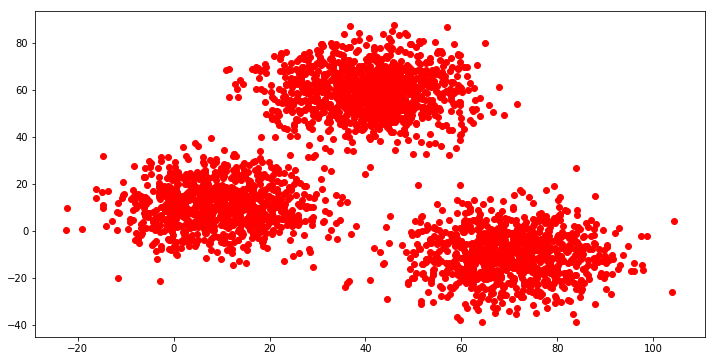

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(x1,x2,c='red')

In [9]:
X = np.array(list(zip(x1, x2)))

In [10]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [11]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

In [12]:
C

array([[17., 74.],
       [52., 42.],
       [13., 21.]], dtype=float32)

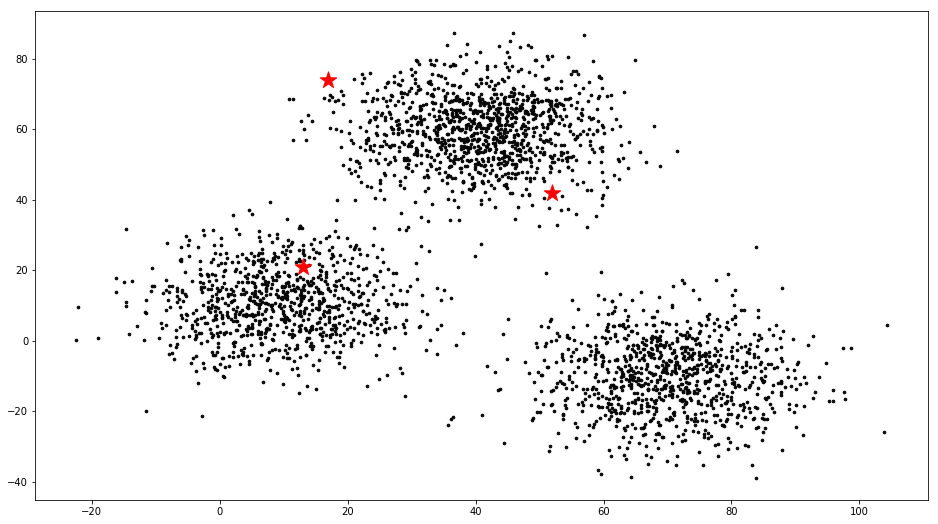

In [14]:
# Plotting along with the Centroids
plt.figure(figsize=(16,9))
plt.scatter(x1, x2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=300, c='r')

In [15]:
C_old = np.zeros(C.shape)

In [16]:
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [17]:
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

In [18]:
clusters

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
def plotData(points,clusters,C):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    plt.figure(figsize=(16,9))
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    plt.show()

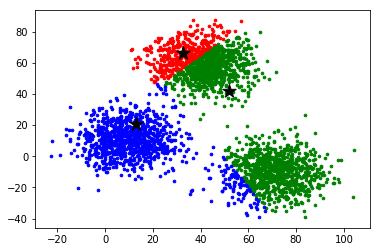

<Figure size 1152x648 with 0 Axes>

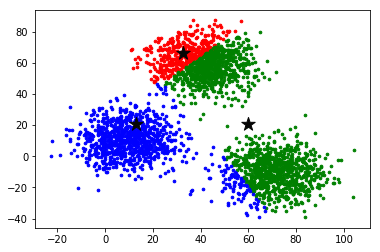

<Figure size 1152x648 with 0 Axes>

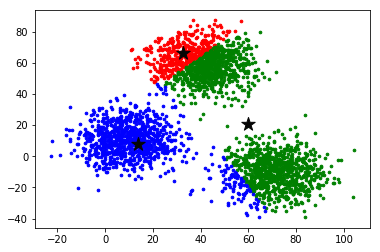

<Figure size 1152x648 with 0 Axes>

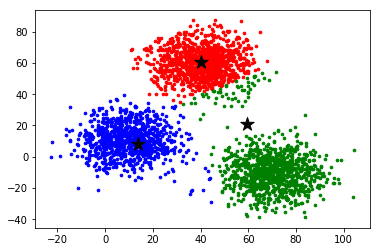

<Figure size 1152x648 with 0 Axes>

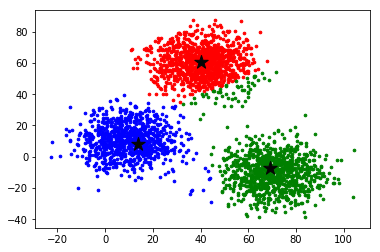

<Figure size 1152x648 with 0 Axes>

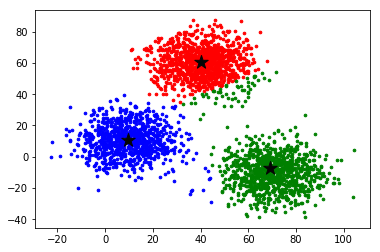

<Figure size 1152x648 with 0 Axes>

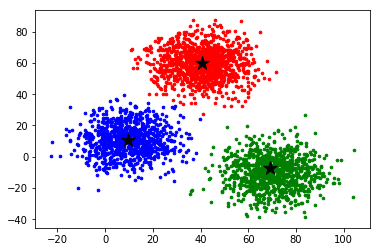

<Figure size 1152x648 with 0 Axes>

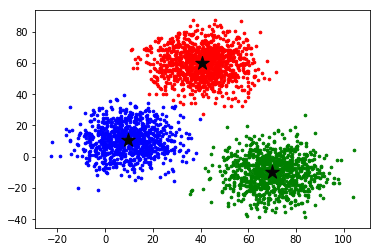

<Figure size 1152x648 with 0 Axes>

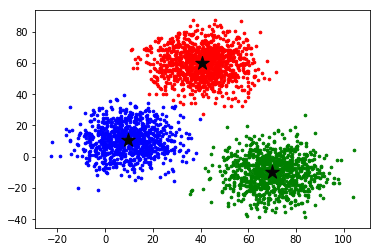

<Figure size 1152x648 with 0 Axes>

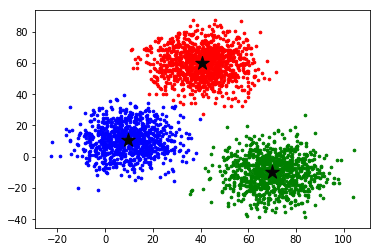

<Figure size 1152x648 with 0 Axes>

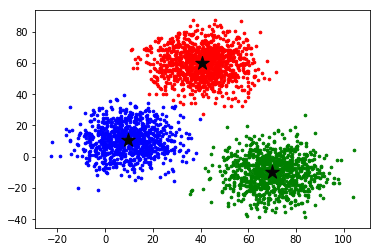

<Figure size 1152x648 with 0 Axes>

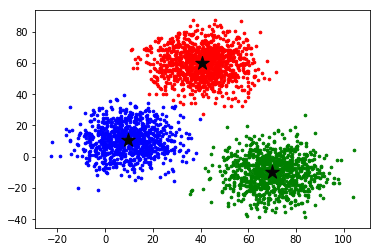

<Figure size 1152x648 with 0 Axes>

In [20]:
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
#         print("Distance is",distances)
        cluster = np.argmin(distances)
#         print("Cluster is",cluster)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = copy.deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
#         print(points)
        C[i] = np.mean(points, axis=0)
        plotData(points, clusters, C)
    error = dist(C, C_old, None)    

In [21]:
C

array([[ 40.683628,  59.715893],
       [ 69.92419 , -10.119641],
       [  9.478045,  10.686052]], dtype=float32)

In [22]:
clusters

array([2., 2., 2., ..., 1., 1., 1.])